In [1]:
import pandas as pd
import numpy as np
import pickle
import sys
import os
import io
import re
import seaborn as sns
from sys import path
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from string import punctuation, digits
from IPython.core.display import display, HTML
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from csv import reader

In [2]:
amazon = pd.read_csv('data/amazon_label.csv',header=None)
amazon.head(20)

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [3]:
amazon.iloc[:,0]

0      So there is no way for me to plug it in here i...
1                            Good case, Excellent value.
2                                 Great for the jawbone.
3      Tied to charger for conversations lasting more...
4                                      The mic is great.
5      I have to jiggle the plug to get it to line up...
6      If you have several dozen or several hundred c...
7            If you are Razr owner...you must have this!
8                    Needless to say, I wasted my money.
9                       What a waste of money and time!.
10                       And the sound quality is great.
11     He was very impressed when going from the orig...
12     If the two were seperated by a mere 5+ ft I st...
13                              Very good quality though
14     The design is very odd, as the ear "clip" is n...
15     Highly recommend for any one who has a blue to...
16                   I advise EVERYONE DO NOT BE FOOLED!
17                             

In [4]:
amazon.columns = ['review', 'label']

In [5]:
keywords = ['good', 'great', 'Excellent', 'recommended', 'works', 'best', 'sweet']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon[str(key)] = amazon.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [6]:
amazon['label'] = (amazon['label'] == 1)

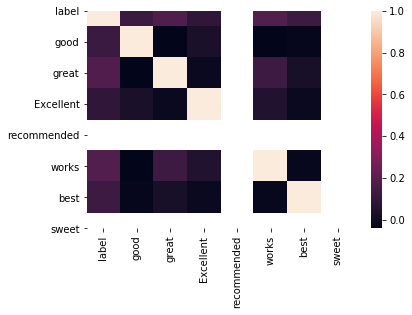

In [7]:
sns.heatmap(amazon.corr())

In [8]:
data = amazon[keywords]
target = amazon['label']

In [9]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 397


In [10]:
# transform this classifier to another dataset 

In [11]:
yelp = pd.read_csv('data/yelp_label.csv',header=None,encoding = "ISO-8859-1")
yelp.head(40)

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [12]:
yelp.iloc[:,0]

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
5         Now I am getting angry and I want my damn pho.
6                  Honeslty it didn't taste THAT fresh.)
7      The potatoes were like rubber and you could te...
8                              The fries were great too.
9                                         A great touch.
10                              Service was very prompt.
11                                    Would not go back.
12     The cashier had no care what so ever on what I...
13     I tried the Cape Cod ravoli, chicken,with cran...
14     I was disgusted because I was pretty sure that...
15     I was shocked because no signs indicate cash o...
16                                   Highly recommended.
17                Waitress was 

In [13]:
yelp.columns = ['message', 'label']

In [14]:
keywords = ['good', 'great', 'Excellent', 'recommended', 'loved', 'highly', 'best','promptly','decent','like','tasty','friendly','delicious','glad','huge','well']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp[str(key)] = yelp.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [15]:
yelp['label'] = (yelp['label'] == 1)

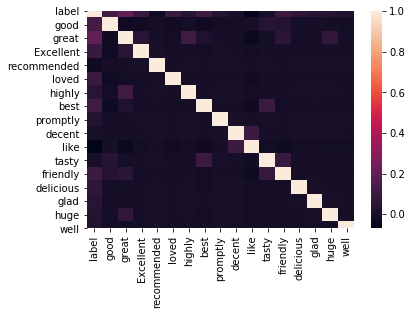

In [16]:
sns.heatmap(yelp.corr())

In [17]:
data = yelp[keywords]
target = yelp['label']

In [18]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 387


In [19]:
# Calculate the accuracy of your model here.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
print("accuracy is :{}".format((data.shape[0]-(target != y_pred).sum())/data.shape[0]))

Number of mislabeled points out of a total 1000 points : 387
accuracy is :0.613


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[480,  20],
       [367, 133]], dtype=int64)

In [21]:

a = target
b = y_pred

match = 0
acc =0
for i in range(0,len(a)):
    if (a[i] == b[i]) & a[i]==True:
        match+=1

        
print(match)
sensitivity=match/(target==1).sum()
print(sensitivity)


133
0.266


In [22]:
for i in range(0,len(a)):
    if a[i] == b[i]:
        acc +=1
        
Accuracy=acc/len(target)
print(Accuracy)

0.613


In [23]:
# apply holdout groups
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.625
Testing on Sample: 0.613


In [24]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

# from the result above in cross-validation, it seems there are over-fitting issue, because the cross_val_score fluctuate

array([0.6 , 0.63, 0.64, 0.58, 0.6 , 0.6 , 0.65, 0.62, 0.57, 0.58])

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)
# typr II error here is 367, type I error 20

array([[480,  20],
       [367, 133]], dtype=int64)

In [29]:
sensitivity=133/(133+367)
print(sensitivity)
specificity=480/(480+20)
print(specificity)

0.266
0.96


In [55]:
# feature selection using sklearn feature selection

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X, y = data, target
X.shape
print(X.shape)
selector = SelectKBest(chi2, k=2).fit_transform(X, y)
#selector.fit(X, y)
X_new=selector.transform(X)
X_new.shape()
selector.get_support(induces=True)

X.columns[selector.get_support(indices=True)]

# 1st way to get the list
vector_names = list(X.columns[selector.get_support(indices=True)])
print(vector_names)

#2nd way
#print(X.columns[selector.get_support(indices=True)].tolist())



(1000, 16)


AttributeError: 'numpy.ndarray' object has no attribute 'transform'

In [ ]:
# Question???
# Which seem to perform the best? Why?
# Which features seemed to be most impactful to performance?